<a href="https://colab.research.google.com/github/ElisaChang001/AI_Course_Titanic/blob/main/Titanic_20220624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic - Machine Learning from Disaster<br>

Download dataset:https://www.kaggle.com/datasets/brendan45774/test-file?resource=download<br>

Predict survival on the Titanic and get familiar with ML basics<br><p><p>
There are three datasets as follow:<br>
(1)train.csv<br>
(2)test.csv<br>
(3)gender_submission.csv<br>

In [ ]:
#Data
#Survived=1,Survived=0=died

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

path_1='/content/train.csv'
path_2='/content/test.csv'
path_3='/content/gender_submission.csv'
df_train = pd.read_csv(path_1)
df_test = pd.read_csv(path_2)
df_gender = pd.read_csv(path_3)
df_train.head()
df_test.head()
df_gender.head()

print ('train',len(df_train)) #891
print ('test',len(df_test))  #418
print ('gender',len(df_gender)) #418

print('Train columns:', df_train.columns.tolist())
print('Test columns:', df_test.columns.tolist())
print('gender columns:', df_gender.columns.tolist())


df_test_1=df_test.merge(df_gender, left_on='PassengerId', right_on='PassengerId')
print(len(df_test_1))

print('df_test_1:', df_test_1.columns.tolist())

train 891
test 418
gender 418
Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
gender columns: ['PassengerId', 'Survived']
418
df_test_1: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']


In [ ]:
#age 
print('CountNaN_age:',df_train["Age"].isna().sum() ) #177

age_median = np.nanmedian(df_train["Age"])
new_Age = np.where(df_train["Age"].isnull(), age_median, df_train["Age"])
df_train["Age"] = new_Age
print('CountNaN_age:',df_train["Age"].isna().sum() )  #0

CountNaN_age: 177
CountNaN_age: 0


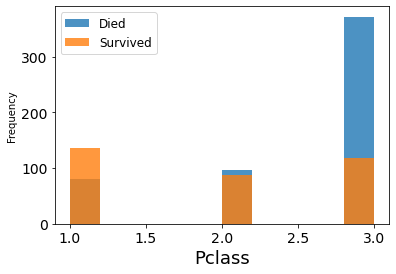

In [ ]:
#pclass
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.figure()
fig = df_train.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.show()

In [ ]:
#sex
from sklearn import preprocessing, linear_model

label_encoder = preprocessing.LabelEncoder()
df_train['encoded_Sex'] = label_encoder.fit_transform(df_train["Sex"])

df_test_2=df_test_1[["Pclass","Age","Sex",'Survived']]
df_test_3=df_test_2.dropna()


df_test_3['encoded_Sex'] = label_encoder.fit_transform(df_test_3["Sex"])
print(len(df_test_3))  #322
print(df_test_3.head())

332
   Pclass   Age     Sex  Survived  encoded_Sex
0       3  34.5    male         0            1
1       3  47.0  female         1            0
2       2  62.0    male         0            1
3       3  27.0    male         0            1
4       3  22.0  female         1            0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#split X_train, X_test, y_train, y_test
#X:age pclass  Y:Survived

df_train.head()  #891
X_train=df_train[["Age",'encoded_Sex','Pclass']]
y_train=df_train[['Survived']]

X_test=df_test_3[["Age",'encoded_Sex','Pclass']]
y_test=df_test_3[['Survived']]

In [ ]:
# Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [ ]:
#Predicting the test set results calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Accuracy=(196+119)/(196+119+8+9)=0.948

[[196   9]
 [  8 119]]


In [ ]:
# Compute precision, recall, F-measure
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       205
           1       0.93      0.94      0.93       127

    accuracy                           0.95       332
   macro avg       0.95      0.95      0.95       332
weighted avg       0.95      0.95      0.95       332



(1)Precision:0.93<br>
(2)Recall:0.94<br>
(3)F1 score:0.93<br>